In [8]:
from google.colab import files
uploaded=files.upload()

Saving Housing.csv to Housing (1).csv


In [9]:
!pip install pandas
import pandas as pd
d=pd.read_csv('Housing.csv')
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [11]:
furnishing_map={
    "unfurnished": 0,
    "semi-furnished": 1,
    "furnished": 2
}

d["furnishingstatus"]=d["furnishingstatus"].map(furnishing_map)


In [14]:
le=LabelEncoder()
cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]

for col in cols:
    d[col] = le.fit_transform(d[col])

In [15]:
d.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [16]:
d

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [18]:
x=d.drop("price", axis=1)
y=d["price"]

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

LinearRegression()

In [32]:
MAE=mean_absolute_error(y_test, y_pred)
MSE=mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test, y_pred)


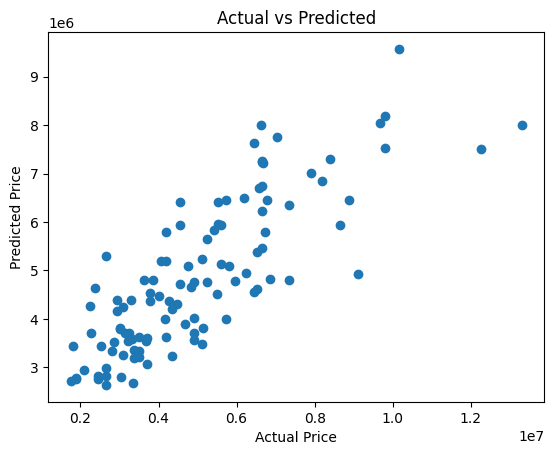

In [29]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()


In [27]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])
coeff_df


,Coefficient
area,2.358488e+02
bedrooms,7.857449e+04
bathrooms,1.097117e+06
stories,4.062232e+05
mainroad,3.668242e+05
guestroom,2.331468e+05
basement,3.931598e+05
hotwaterheating,6.878813e+05
airconditioning,7.855506e+05
parking,2.257565e+05


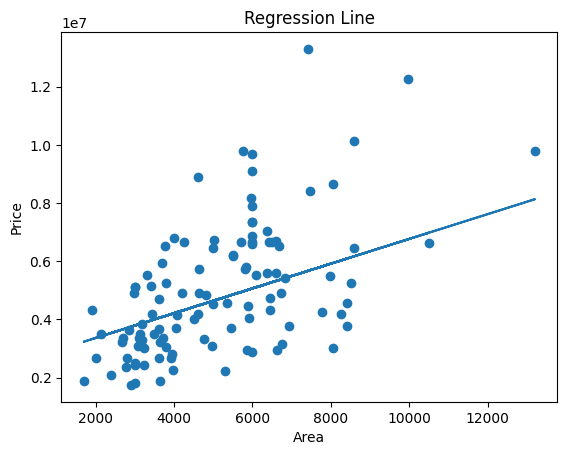

In [31]:
X_1 = d[["area"]]
y = d["price"]

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

y_pred_simple = model_simple.predict(X_test)


plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_simple)
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Regression Line")
plt.show()


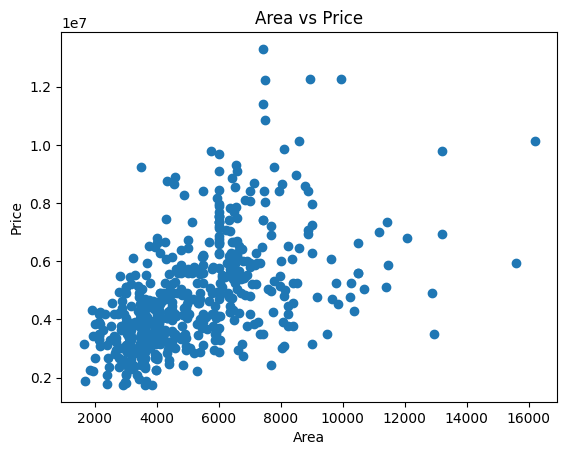

In [36]:
plt.scatter(d["area"], d["price"])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")
plt.show()


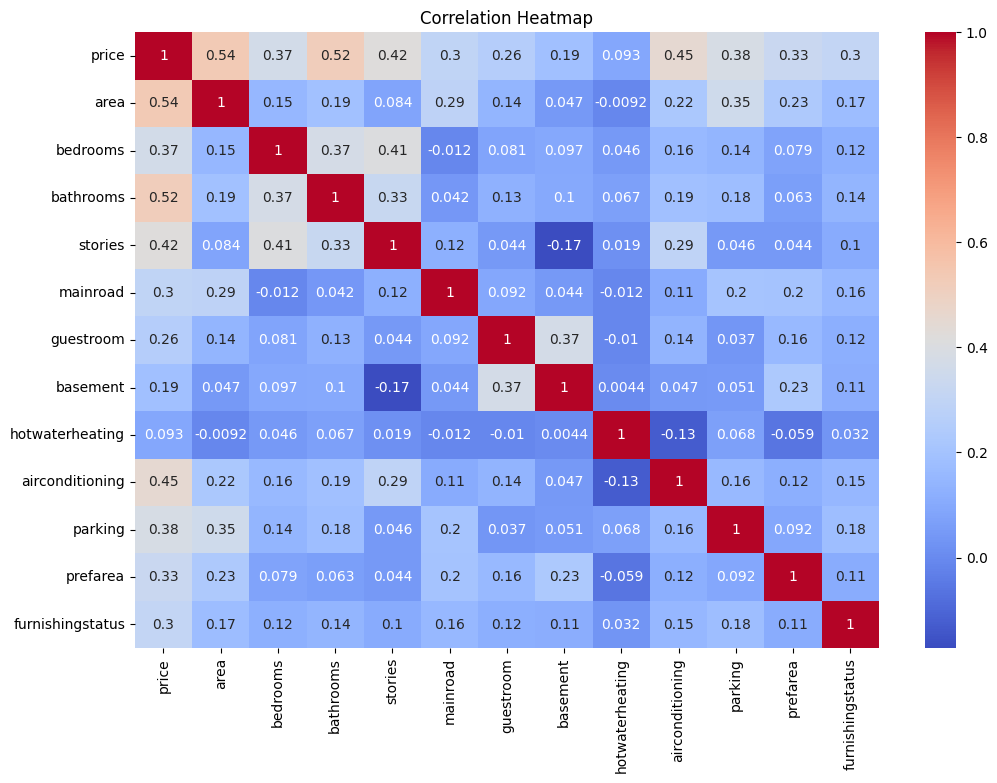

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(d.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
